In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
titanic_file_path = "titanic.csv"
titanic_data = pd.read_csv(titanic_file_path)


cleaning of the titanic.csv

In [2]:
titanic_data['Title'] = titanic_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
titanic_data['Title'] = titanic_data['Title'].replace({
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs',
    'Lady': 'Rare', 'Countess': 'Rare', 'Capt': 'Rare', 'Col': 'Rare',
    'Don': 'Rare', 'Dr': 'Rare', 'Major': 'Rare', 'Rev': 'Rare',
        'Sir': 'Rare', 'Jonkheer': 'Rare', 'Dona': 'Rare'})


In [3]:
titanic_data['Age'] = titanic_data.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))


In [4]:
def deal_nan(columns,with_what):
    return titanic_data.fillna({columns: with_what}, inplace=True)
deal_nan('Cabin','Unknown')
#removes duplicates rows
titanic_data.drop_duplicates(inplace=True)
titanic_data['Cabin_letter'] = titanic_data['Cabin'].astype(str).str[0]

data exploration of titanic.csv

In [5]:
titanic_data.tail(20)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Cabin_letter
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,Mrs,D
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,Mr,B
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,Unknown,S,Mr,U
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,Unknown,C,Mrs,U
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,Unknown,C,Miss,U
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,Unknown,S,Mr,U
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,Unknown,S,Mr,U
878,879,0,3,"Laleff, Mr. Kristo",male,30.0,0,0,349217,7.8958,Unknown,S,Mr,U
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,Mrs,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,Unknown,S,Mrs,U


<Axes: xlabel='Survived'>

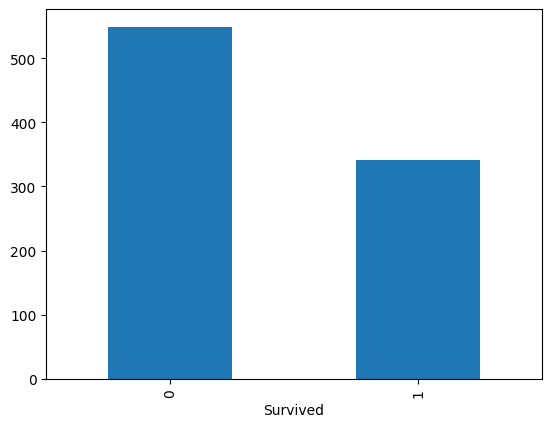

In [7]:
titanic_data['Survived'].value_counts().plot(kind = 'bar')

In [5]:
titanic_data.groupby(['Sex','Survived']).size().unstack(fill_value=0)


Survived,0,1
Sex,,
female,81,233
male,468,109


<Axes: ylabel='Survived'>

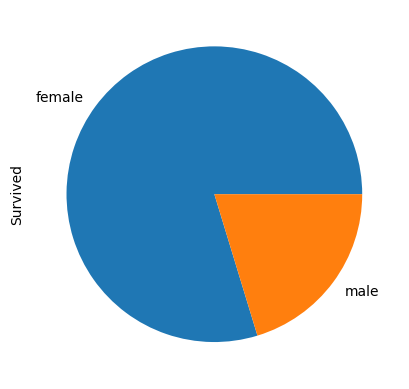

In [6]:
titanic_data.groupby('Sex')['Survived'].mean().plot(kind = 'pie')

In [24]:
titanic_data.select_dtypes(include='object').columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Title', 'Cabin_letter'], dtype='object')

econding of necceassary columns

In [38]:
titanic_data_encoded = pd.get_dummies(titanic_data, columns=['Title','Cabin_letter','Sex', 'Embarked', 'Pclass'], drop_first=True)

definition of neccessary feautures

In [39]:
feature = ['Pclass']
X = titanic_data_encoded.drop(["Survived", "PassengerId", "Name", "Cabin", "Ticket"], axis=1)
y = titanic_data_encoded['Survived']


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic regression model

In [ ]:
model_lr = LogisticRegression(max_iter=1000,random_state=0)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
y_pred_label = pd.Series(y_pred_lr).map({0: "did not survived", 1: "survived"})
print(y_pred_label)

0          survived
1      not survived
2      not survived
3          survived
4          survived
           ...     
174    not survived
175    not survived
176    not survived
177        survived
178        survived
Length: 179, dtype: object


In [48]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("accuracy of this model is:", round(accuracy_lr, 2))

accuracy of this model is: 0.82


random forest

In [50]:
model_rf = RandomForestClassifier(random_state=0)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
yrf_pred_label = pd.Series(y_pred_rf).map({0: "did not survived", 1: "survived"})
print(yrf_pred_label)

0              survived
1      did not survived
2      did not survived
3              survived
4      did not survived
             ...       
174    did not survived
175    did not survived
176    did not survived
177            survived
178            survived
Length: 179, dtype: object


In [53]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("accuracy of this model is:", round(accuracy_rf, 2))

accuracy of this model is: 0.82


In [55]:
model_xg = XGBClassifier(random_state=0)
model_xg.fit(X_train, y_train)
y_pred_xg = model_xg.predict(X_test)
yxg_pred_label = pd.Series(y_pred_xg).map({0: "did not survived", 1: "survived"})
print(yxg_pred_label)

0              survived
1      did not survived
2      did not survived
3              survived
4              survived
             ...       
174    did not survived
175    did not survived
176    did not survived
177            survived
178            survived
Length: 179, dtype: object


In [56]:
accuracy_xg = accuracy_score(y_test, y_pred_xg)
print("accuracy of this model is:", round(accuracy_xg, 2))

accuracy of this model is: 0.82
